CAPÍTULO 2 

Estatística Computacional - Probabilidade com Python

Qual o número de possibilidades ao jogar 6 números na mega sena?

In [4]:
#Código de combinações
import math

In [5]:
#Exemplo 1
#Número total de elementos (n)
n = 3
#Número de elementos a serem escolhidos (k)
k = 2

#Calcula o número de combinações
combinacoes_possiveis = math.comb(n, k)

print(f'O número de combinações é: {combinacoes_possiveis}')

O número de combinações é: 3


In [6]:
#Resolvendo o problema inicial
#Número total de elementos (n)
n = 60
#Número de elementos a serem escolhidos (k)
k = 6

#Calcula o número de combinações
combinacoes_possiveis = math.comb(n, k)

print(f'O número de possibilidades ao escolher 6 números na mega sena é: {combinacoes_possiveis:,}')


O número de possibilidades ao escolher 6 números na mega sena é: 50,063,860


In [7]:
#E se eu jogar 10 números?
#Número total de elementos (n)
n = 60
#Número de elementos a serem escolhidos (k)
k = 6
#Números jogados
njogados = 10

#Calcula o número de combinações das jogadas
combinacoes_jogadas = math.comb(njogados, k)

print(f'O número de combinar {njogados} números em grupos de 6 é: {combinacoes_jogadas}')


O número de combinar 10 números em grupos de 6 é: 210


In [8]:
#Calcula o número de combinações totais possíveis
combinacoes_possiveis = math.comb(n, k)

print(f'A probabilidade de vitória com {njogados} números é de {combinacoes_jogadas} em: {combinacoes_possiveis}')

A probabilidade de vitória com 10 números é de 210 em: 50063860


Trabalhando com Variáveis aleatórias discretas

Exemplo: Ao passar 10 clientes em nossa loja, qual a probabilidade de realizarmos 2 vendas? 

Ou seja, queremos encontrar a probabilidade de dois sucessos, em dez tentativas, suja probabilidade de sucesso em cada tentativa é 50%.

In [9]:
from scipy.stats import binom

In [10]:
#Definindo os parâmetros
x = 2 #sucessos
size = 10 #Tentativas
prob = 0.5 #Prob sucesso

#Calculando probabilidade
probability = binom.pmf(x, size, prob)
print(probability)

0.04394531250000005


Probabilidade, Probabilidade acumulada e amostragem

A biblioteca stats utiliza pmf para probabilidade, cdf para possibilidade acumulada e rvs para uma amostra segundo a variável aleatória.

binom.pmf(k, n, p) calcula a probabilidade de obter mais de k sucessos em n tentativas com a probabilidade de p sucesso em cada tentativa.

binom.cdf(q, n, p) calcula o número de sucessos correspondentes à probabilidade cumulativa q em n tentativas com a probabilidade p de sucesso em cada tentativa.

binom.rvs(n, p, size) gera amostras aleatórias seguindo uma distribuição binomial com n tentativas e probabilidade p de sucesso. Size refere-se ao número de amostras desejado.

In [11]:
from scipy.stats import binom

In [12]:
#Definindo os parâmetros
k = 2
n  = 10
prob = 0.5

#Calcula a probabilidade de 2 sucessos em 10 jogadas, com probabilidade 0,5 de sucesso
probability = binom.pmf(k, n, prob)
print('Probabilidade de k sucessos em 10 lançamentos: ', probability)

Probabilidade de k sucessos em 10 lançamentos:  0.04394531250000005


In [13]:
#Calcula a probabilidade acumulada de 2 sucessos em 10 jogadas (ou seja, de 0, 1 e 2 sucessos), com porbabilidade 0,5 de sucesso
print('Probabilidade acumulada: ', binom.cdf(k, n, prob))

Probabilidade acumulada:  0.0546875


In [14]:
#É a mesma coisa que somar as chances de 0, 1 e 2 sucessos
print('Somando chances de 0, 1 e 2 sucessos: ', binom.pmf(0, n, prob) + binom.pmf(1, n, prob) + binom.pmf(2, n, prob))

Somando chances de 0, 1 e 2 sucessos:  0.05468750000000005


Exemplo de geração de números aleatórios a partir de uma variável aleatória

In [15]:
#Vamos jogar uma moeda e verificar quantas caras ocorreram
from scipy.stats import bernoulli

In [16]:
#Definindo a probabilidade de sucesso (p)
p = 0.5 #Por exemplo, p = 0,5 sugnifica 50% de chance de obter 1

#Gerando 15 números a partir da distribuição de Bernoulli
n = 15

sorteios = bernoulli.rvs(p, size=n)

#Exibindo o resultado
print('Números sorteados: ', sorteios)

Números sorteados:  [1 0 0 0 0 1 1 1 0 1 0 0 1 1 0]


A fim de mostrar que há outras bibliotecas estatísticas, vamos utilizar a biblioteca numpy para gerar os números aleatórios segundo uma binomial e o matplotlib para plotar.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

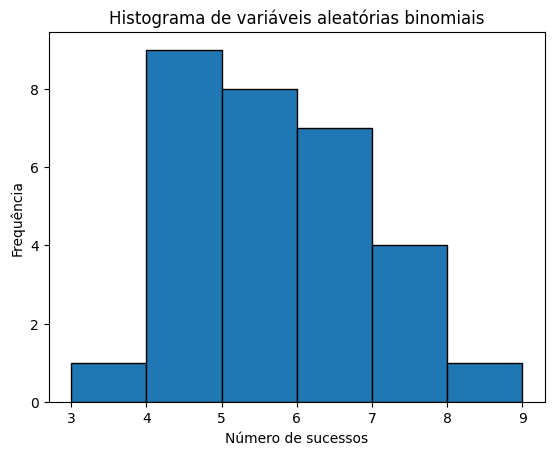

In [18]:
#Gerando os números binomiais
va_binomial = np.random.binomial(n=10, p=0.5, size=30)

#Criando o histograma para visualização
plt.hist(va_binomial, bins=range(min(va_binomial),max(va_binomial)+2), edgecolor='black')
plt.xlabel('Número de sucessos')
plt.ylabel('Frequência')
plt.title('Histograma de variáveis aleatórias binomiais')
plt.show()

Distribuição Geométrica

Exemplo: Definindo como sucesso o cliente comprar, e supondo que a probabilidade de sucesso é 50%. Qual a probabilidade de a primeira venda ocorrer quando o quinto cliente entrar na loja?

In [19]:
from scipy.stats import geom

In [21]:
#Definindo os parâmetros
x = 5
prob = 0.5

#Calculando a probabilidade
probability = geom.pmf(x, prob)
print(probability)

#Onde: x é o número de tentativas até o primeiro sucesso (incluindo o sucesso), e prob é a probabilidade de sucessos.

0.03125


In [22]:
#Podemos utilizar a mesma função e nos dar a probabilidade do sucesso ocorrer na primeira tenattiva, segunda tentativa, terceira tentativa... até a décima tentativa.

import numpy as pd
import matplotlib.pyplot as plt
from scipy.stats import geom

In [23]:
#Definindo os parâmetros
x = np.arange(1, 11)
prob = 0.5

#Calculando as probabilidades
va_geomatrica = geom.pmf(x, prob)
#Exibindo as probabilidades
print(va_geomatrica)

[0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312 0.00097656]


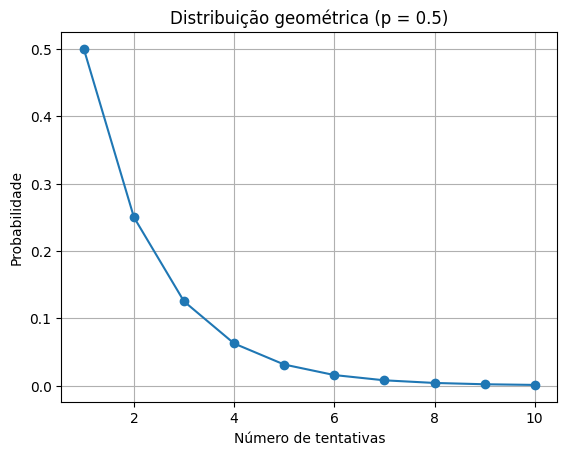

In [24]:
#Criando o gráfico
plt.plot(x, va_geomatrica, marker='o')
plt.xlabel('Número de tentativas')
plt.ylabel('Probabilidade')
plt.title('Distribuição geométrica (p = 0.5)')
plt.grid(True)
plt.show()

Distribuição Normal

Exemplo: Suponha que a distribuição dos salários dos funcionários de uma empresa sigam uma distribuição nromal com média 2.500 e desvio padrão 170. Ao selecionar aleatoriamente um indivídio dessa população, qual a probabilidade de ter salário entre 2.400 e 2.600? 

Precisamos achar a probabilidade do indivíduo ter um salário de até 2.600 e subtrair pela probabilidade do indivíduo ter o salário de 2.400.

In [25]:
from scipy.stats import norm

In [26]:
#Definindo os parâmetros
mean = 2500 #Média
sd = 170 #Desvio padrão

#Calculando as probabilidades acumuladas
probabilidade_ate_2600 = norm.cdf(2600, mean, sd)
probabilidade_ate_2400 = norm.cdf(2400, mean, sd)

#Calculando a diferença das probabilidades
diferenca_probabilidade = probabilidade_ate_2600 - probabilidade_ate_2400

print(diferenca_probabilidade)

0.4436256295730932


Exemplo 2: Podemos gerar 100 números aleatórios para uma distribuição normal com média 2500 e desvio padrão 170.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#Definindo os parâmetros
n = 100 #Número de ocorrências
mean = 2500 #Média
sd = 170 #Desvio padrão

#Gerando os números da distribuição normal
va_normal = np.random.normal(mean, sd, n)
print(va_normal)


[2564.37532255 2264.33743724 2406.52921051 2491.60340423 2444.8404107
 2521.0570059  2580.28624378 1929.74802475 2628.99901807 2290.1096507
 2701.98329584 2662.15126697 2373.61905496 2536.01659493 2362.19422715
 2524.41624376 2454.27034293 2502.58187257 2758.30776442 2312.15472454
 2475.64142078 2579.00088771 2380.00347563 2379.24500989 2554.81204473
 2308.59425797 2501.1759967  2146.31817593 2450.42016933 2468.08526353
 2459.72489826 2434.16034336 2300.08248351 2515.30380621 2447.42071737
 2498.24563941 2425.45380576 2436.09856284 2647.48165926 2520.81148149
 2162.75135214 2774.51003909 2323.94384226 2278.01659649 2210.1082706
 2453.65789053 2658.06679914 2494.28625243 2527.2218019  2089.57298253
 2868.57896981 2596.83606567 2635.57709574 2539.27438111 2331.13964894
 2355.19826749 2545.58548147 2387.99497426 2365.75604918 2510.69314807
 2356.41970272 2678.29184398 2541.6053479  2597.17032024 2626.03160151
 2729.30651095 2402.0522093  2507.1925476  2301.71887312 2628.36252129
 2258.362

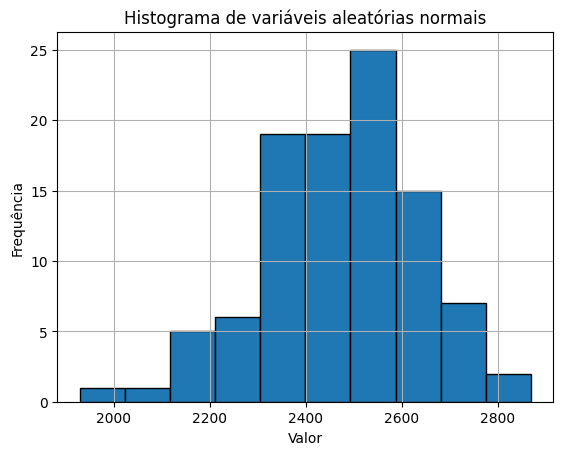

In [31]:
#Criando o histograma
plt.hist(va_normal, bins=10, edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma de variáveis aleatórias normais')
plt.grid(True)
plt.show()

Distribuição F

Exemplo: Gerando uma amostra aleatória de 1000 números seguindo uma distribuição F

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

In [33]:
#Definindo os parâmetros
n = 1000
df1 = 5
df2 = 33

#Gerando os números da distribuição F
va_f = f.rvs(df1, df2, size=n)
print(va_f)

[0.12382936 0.68135821 0.59534244 0.25142067 0.60472051 1.78814583
 1.0014187  0.85396285 0.12729697 0.33789415 1.21145426 0.3449807
 0.96481967 0.36594332 0.75323458 0.89322665 1.4644975  0.44274905
 1.21635839 0.92574573 0.56246785 1.18511657 1.09525199 0.43968284
 0.58972104 1.67809161 0.87161691 1.85880535 0.86141207 0.25942024
 0.64955952 1.55693236 0.74985681 1.12395131 0.40777436 0.69434277
 0.99842713 0.62495072 0.36106121 0.43802401 2.41467122 0.51774495
 0.49469805 0.47959018 0.15090933 0.50450993 1.02219031 0.64999319
 1.30717732 0.24692662 1.30411484 0.92514243 0.60507872 1.96703067
 1.74399161 1.53110316 0.62778641 0.4709014  0.23335322 3.19533187
 1.32526154 0.26736779 1.77454921 0.23138388 0.67070489 0.59771161
 1.51977861 1.72333505 0.85387058 0.41387316 1.46596105 1.20791225
 0.49251308 0.37563677 0.9557253  1.82121784 2.5040492  2.26949752
 0.5493361  0.89152951 1.18147298 1.79547702 0.67531161 0.81984391
 2.33983988 0.32032146 2.09472455 1.37767207 0.81541253 1.41393

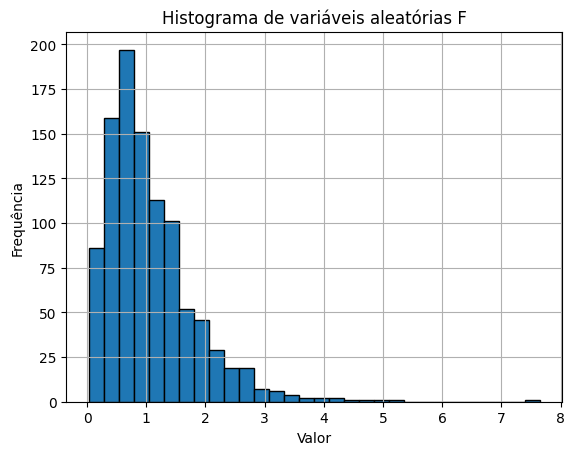

In [34]:
#Criando o histograma
plt.hist(va_f, bins=30, edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma de variáveis aleatórias F')
plt.grid(True)
plt.show()

In [ ]:
#Vá aumentando os graus de liberade e veja como a distribuição se aproxima da normal. Informação extra: uma distribuição F é a razão entre duas qui-quadrado.

CAPÍTULO 3

Teorema do Limite Central

O Teorema do Limite Central é um dos `print('sdfjsfdjsnfslkfns)` mais importantes da estatítica: ele mostra como a aleatoriedade de pequenas partes pode resultar em um comportamento previsível quando olhamos muitas observações. Não importa como é a distribuição incial, se você pegar a soma da média de muitos resultados, a resultante vai formar uma curva em forma de sino, a curva Normal (ou Gaussiana).